In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
from datetime import date
from matplotlib import pyplot as plt
from matplotlib import dates as mdates

# Part 1 : Describe

The raw data I obtained are three excel spreedsheets, namely:
* Users2021.xlsx : contains data of user basic information birth date, gender and location
* CustomerMedicalConditions04Nov21.xlsx : contains information of users' medical condition specified in "CareSysCondition".
* CCDate2018-2021.xlsx : contains users activity data from 2018 to 2021.

The general type of data is tabular data consisting of numberical values and categorical values.

## load the data and describe

### load the "Users2021.xlsx"

In [2]:
# load file into dataframe
userdf  = pd.read_excel('Users2021.xlsx')
userdf

User ID                             VisitorID  ExternalID Birth date  \
0         213  7447300C-B772-4779-9AC8-0A28B5BBBFF4         NaN        NaT   
1         298  F298F6B9-77E2-459D-96EE-F588FA2BC5B1         NaN        NaT   
2         314  5E896124-3F0E-4D01-915D-BAE9B3F1A39A         NaN        NaT   
3         370  E71C1EB8-6E61-4DB5-BE19-8E3AB8FBE95C       999.0        NaT   
4         387  D7686862-D926-49CB-93CA-B8676CA2A91A         NaN        NaT   
...       ...                                   ...         ...        ...   
3636     5671  5CEA1684-0922-49E7-859D-40A8DF20B4B6      9601.0 2002-09-24   
3637     5672  7AA63722-737A-4313-966A-320842DD26C9         NaN        NaT   
3638     5673  1A7A9E9B-F89A-444C-9817-C5E2C2D06BFA         NaN        NaT   
3639     5674  F60407F3-CEE0-485C-AECB-B0CFE4ECBCC8      9602.0 2001-12-22   
3640     5676  BE652161-DEAF-4A3F-9A76-F8D1E4E99B49      9603.0        NaT   

      Gender                                           Location  
0       Male                                                NaN  
1       Male                                                NaN  
2       Male                                                NaN  
3       Male                                   Aberdeen Council  
4       Male                                                NaN  
...      ...                                                ...  
3636  Female   National/North/Stirling Council/Forth Valley C@H  
3637  Female                                           National  
3638  Female                                           National  
3639  Female  National/EAST /Edinburgh City Council/Edinburg...  
3640    Male  National/North/Dundee City Council/Menzieshill...  

[3641 rows x 6 columns]

In [3]:
# count number of rows and columns in userdf
userdf.shape

(3641, 6)

There are 6 columns and 3641 rows in "Users2021.xlsx" that contains information of users left in 2021. Each row represent a specific user. In terms of columns, each column represent a field that contains part of information of that user. After I talk to the data holder and make understand of the context of each field, I find that some fields are meaningful and potentially be used in later presentation like "birth date", "gender" and "location". 

To check out the data type for each column:

In [4]:
# display data type of each column(fields)
userdf.dtypes

User ID                int64
VisitorID             object
ExternalID           float64
Birth date    datetime64[ns]
Gender                object
Location              object
dtype: object

### how this fields relate to the further exploration
We can see that there are two fields of numberical values that are "User ID" and "ExternalID". There are three columns that are object dtype which is mix of data types. Among which:
* "User ID" might be the primary key to specify unique user in database
* "External ID" is the foreign key to link between this data and other data
* "Birth date" is the date of birth for each user, can be used to calculate the age
* "Gender" might generally show in two levels: female and male
* "location" specify where the user live

To valide with above assumption, if the "User ID" is really unique? If the qualitative variable of gender has only two levels? I need to check out:

In [5]:
# if the "User ID" is unique and has no repetition?

if userdf['User ID'].is_unique:
    print('user id is unique')
else:
    print('user id is not unique, the duplicated values shown in below')
    userdf.loc[Userdf['User ID'].duplicated(keep = False), :]

user id is unique


In [6]:
# how many levels do gender field have?
userdf['Gender'].value_counts()

Female         2383
Male           1184
Unspecified      74
Name: Gender, dtype: int64

It looks like majority users have specifed gender information that is either female or male. The number of females is around **two times** as large as males. Only 74 users don't specify their gender information. 

### load the "CustomerMedicalConditions04Nov21.xlsx"

In [7]:
# load file into dataframe
medicaldf  = pd.read_excel('CustomerMedicalConditions04Nov21.xlsx')
medicaldf

External ID  CleverCogsUserId Gender DateOfBirth   Age  \
0           4703               685      F  1965-07-04  56.0   
1           4704               772      F  1940-06-21  81.0   
2           4706              1128      F  1931-02-25  90.0   
3           4707              1159      F  1982-09-18  39.0   
4           4708               784      F  1931-12-20  90.0   
...          ...               ...    ...         ...   ...   
1306        9586              5656      F  1932-04-09  89.0   
1307        9594              4060      M  1948-10-08  73.0   
1308        9600              5670      M  1952-11-02  69.0   
1309        9604              5678      M  1948-05-26  73.0   
1310        9605              5679      F  1967-05-19  54.0   

                                    StaffPlanConditions CareSysCondition  
0                                                   NaN     Spina Bifida  
1                                                   NaN             COPD  
2                                                   NaN         Dementia  
3                                                   NaN     Brain Injury  
4                                                   NaN              NaN  
...                                                 ...              ...  
1306  Dementia                                      ...              NaN  
1307  Multiple Sclerosis                            ...              NaN  
1308                                                NaN              NaN  
1309                                                NaN             COPD  
1310                                                NaN              NaN  

[1311 rows x 7 columns]

In [8]:
# calculate the size of medicaldf
medicaldf.shape

(1311, 7)

In [9]:
# how many levels do CareSysCondion field has?
medicaldf['CareSysCondition'].value_counts()

Elderly Care/Support              268
Dementia                          126
Mental Health Issues               81
Cerebral Palsy                     73
Multiple Sclerosis                 47
Brain Injury                       42
Learning Difficulties              37
Stroke                             37
COPD                               34
Cancer                             30
Lifelong Mobility Issues           27
Spina Bifida                       26
Arthritis                          23
Parkinsons                         20
Diabetes                           20
Epilepsy                           17
Amputee                            13
Visual Impairment                  11
Bi Polar Disorder                  11
Spinal Injury                       8
Huntington's                        8
Addiction Issues                    5
Asthma                              4
Muscular Dystrophy                  4
Down Syndrome                       2
OCD                                 2
Cerebellar A

In [10]:
# display data type of each column(fields)
medicaldf.dtypes

External ID                    object
CleverCogsUserId                int64
Gender                         object
DateOfBirth            datetime64[ns]
Age                           float64
StaffPlanConditions            object
CareSysCondition               object
dtype: object

After confimation with data holder and tutor, there are some fields that are useful for further exploration:
* External ID : used to link this data with other data like userdf
* age: correponds to the date of birth
* CareSysCondition: can be a supplementary information of medical condition for data in userdf

### load the "CCDate2018-2021.xlsx"

In [11]:
# load file into dataframe
CCdf  = pd.read_excel('CCDate2018-2021.xlsx')
CCdf

Time                             VisitorID  \
0      2021-11-01 17:10:52.770  F7331B56-15F0-4793-9E09-5D9E2510A053   
1      2021-11-01 17:10:49.690  F7331B56-15F0-4793-9E09-5D9E2510A053   
2      2021-11-01 17:08:51.533  618B75EE-0A49-454C-82B7-6827A9BBA6A5   
3      2021-11-01 17:08:41.883  618B75EE-0A49-454C-82B7-6827A9BBA6A5   
4      2021-11-01 17:07:40.843  F7331B56-15F0-4793-9E09-5D9E2510A053   
...                        ...                                   ...   
654910 2018-01-01 00:46:46.997  1BA7F190-33E1-4B53-A900-2ED503B41187   
654911 2018-01-01 00:46:44.927  1BA7F190-33E1-4B53-A900-2ED503B41187   
654912 2018-01-01 00:29:21.943  1BA7F190-33E1-4B53-A900-2ED503B41187   
654913 2018-01-01 00:20:07.113  1BA7F190-33E1-4B53-A900-2ED503B41187   
654914 2018-01-01 00:20:05.243  1BA7F190-33E1-4B53-A900-2ED503B41187   

        ExternalID  Role        Location        Link Title Link  Type  \
0           5325.0  User     Broom Court     Comfort Break   Services   
1           5325.0  User     Broom Court           Ask For   Category   
2           8899.0  User  67 Glamis Road      My Care Team   Category   
3           8899.0  User  67 Glamis Road           My Care   Category   
4           5325.0  User     Broom Court  Family & Friends   Internet   
...            ...   ...             ...               ...        ...   
654910      5055.0  User   North Housing          Facebook   Internet   
654911      5055.0  User   North Housing      My Interests   Category   
654912      5055.0  User   North Housing          Facebook   Internet   
654913      5055.0  User   North Housing          Facebook   Internet   
654914      5055.0  User   North Housing      My Interests   Category   

                       ContentInfo                       URL  
0       -1|329|10|Comfort Break|1|                      LIST  
1                              NaN                       NaN  
2                              NaN                       NaN  
3                              NaN                       NaN  
4                              NaN              contacts.asp  
...                            ...                       ...  
654910                         NaN  https://www.facebook.com  
654911                         NaN                       NaN  
654912                         NaN  https://www.facebook.com  
654913                         NaN  https://www.facebook.com  
654914                         NaN                       NaN  

[654915 rows x 9 columns]

In [12]:
# calculate the size of CCdf
CCdf.shape

(654915, 9)

In [13]:
# display data type of each column(fields)
CCdf.dtypes

Time           datetime64[ns]
VisitorID              object
ExternalID            float64
Role                   object
Location               object
Link Title             object
Link  Type             object
ContentInfo            object
URL                    object
dtype: object

It shows that there is only one column of numercial values which is "External ID". There are some fields that are meaningful and I would like to choose for further exploration:
* Time : the datetime object that records when an interactive activity initiated by users
* External ID : the number can be used to link this data with other data like userdf
* Link Title : the name of activity module provided in software, visited by users
* Link Type : the type of activity provided in sofware, visited by users
* URL : some supplementary information of external link, giving us hint on context of the activity

The field of "Link Title" and "Link Type" give lots of information and potential insights, thus I decide to look into levels of this two qualitative variables.

In [14]:
# how many levels do Link Title have
CCdf['Link Title'].value_counts()

Entertainment                     81647
My Interests                      35223
Google                            34945
YouTube                           27335
My Music                          26871
                                  ...  
Hollyoaks Episodes                    1
Local Information - Midlothian        1
History of Test Cards                 1
VW Camper Vans                        1
Broom Court Christmas Menu            1
Name: Link Title, Length: 1666, dtype: int64

In [15]:
# delimenate the extra space in "Link  Type"
CCdf.rename(columns={'Link  Type':'Link Type'}, inplace=True)

# how many levels do Link Type have
CCdf['Link Type'].value_counts()

Category         313265
Internet         301597
HTML page         16176
Radio             15500
Services           7639
Gallery             361
Standard page       288
TV                   79
MP3 player            9
Phone                 1
Name: Link Type, dtype: int64

There are more than 1600 kinds of activites visited by users and all online activities belongs to 10 groups. Most of them falls into the "category". The service type may be interested to look into as it relates to the health and care service provided through Clevercogs. 

Have a look at the earliest date and latest date recorded in CCdf.

In [16]:
# start and end of datetime that records users activities
CCdf['Time'].min(), CCdf['Time'].max()

(Timestamp('2018-01-01 00:20:05.243000'),
 Timestamp('2021-11-01 17:10:52.770000'))

Users activities on Clevercogs started from 2018-01-01 until 2021-11-01.

### Summary of data describtion:
Totally three tabular data provided. There are some intial findings from observation:
* Around 3641 users information on gender, location, birthdate(age)
* However, only 1311 pieces of records on users medical information, among which, there are still a lot of null values. It means less than one-third of users have their medical condition information.
* Most of fields are categorical values that can be grouped and categorize for further exploration.
* Many columns contain null values which should be take care in further stage (may be treat them seperately).
* Only age information of numerical types. Besides, there is no other quantitative values used to look into mean, variance, max, min and average, unless I spawn new values based on original data.
* The time span for three years regarding to users activities on Clevercogs. The timeseries data is important in analyze based on day/week/month/year.  

# Part 2 : Explore

This part, I will explore to profile what kind of users are using Clevercogs. What are the distribution of age, gender and health condition. Then, proceed to explore users active trends on certain month but in different year. Next. I will going to look into some certain kinds activities and correlation of them.

First, I am going to clean and merge some data into a new cleaned data -- "Userdf", which serves as basis for me to analyze the users information.

In [17]:
# check how much null value in column ExternalID
userdf['ExternalID'].isnull().sum()

977

In [18]:
# check percentage of missing values in column ExternalID 
userdf['ExternalID'].isnull().sum() / len(userdf) * 100

26.83328755836309

After consulting to the data holder and tutor, we reach an agreement on analysis based on users whose ExternalID is not null. Because ExternalID serves as key to join several tables together. If no ExternalID presented, then no additional information on activities and health condition, which seems no point in further analysis.  

Hence, I decide to drop these one-forth values of users who don't have ExternalID

In [19]:
# drop rows with ExternalID equal to NaN and assign it to Userdf
Userdf = userdf.dropna(subset=['ExternalID'], inplace=False)
Userdf

User ID                             VisitorID  ExternalID Birth date  \
3         370  E71C1EB8-6E61-4DB5-BE19-8E3AB8FBE95C       999.0        NaT   
5         513  AECC9A91-F1C8-48AE-905A-F7B154F3856F       998.0        NaT   
10        523  0FBAE268-6A07-4E4B-BCD2-A0DADAAD702D      5089.0 1980-01-05   
14        527  B2F7DAC6-4A8F-4D83-8684-0A5CCAACA9B8      5643.0 1980-04-04   
19        532  42903CBD-8A6B-43C7-98D0-37962BCF3B33      5245.0        NaT   
...       ...                                   ...         ...        ...   
3634     5669  AA7D0684-B18F-4F3B-8550-B6D31C6860F7      9599.0        NaT   
3635     5670  6DC0A37F-1138-4870-99CA-264F28AA2F66      9600.0 1952-11-02   
3636     5671  5CEA1684-0922-49E7-859D-40A8DF20B4B6      9601.0 2002-09-24   
3639     5674  F60407F3-CEE0-485C-AECB-B0CFE4ECBCC8      9602.0 2001-12-22   
3640     5676  BE652161-DEAF-4A3F-9A76-F8D1E4E99B49      9603.0        NaT   

      Gender                                           Location  
3       Male                                   Aberdeen Council  
5       Male                                           National  
10      Male  Test Machines Live/Test Region/Test Area/Test ...  
14    Female                                           National  
19    Female    National/North/Stirling Council/Broom Care Home  
...      ...                                                ...  
3634    Male  National/EAST /Edinburgh City Council/Edinburg...  
3635    Male  National/EAST /Edinburgh City Council/Edinburg...  
3636  Female   National/North/Stirling Council/Forth Valley C@H  
3639  Female  National/EAST /Edinburgh City Council/Edinburg...  
3640    Male  National/North/Dundee City Council/Menzieshill...  

[2664 rows x 6 columns]

In [20]:
# check that all users' ExternalID is unique
Userdf['ExternalID'].is_unique

True

Then, I am going to append the heath condition information from "Medicaldf" to "Userdf". I will do the merge based on the key 'ExternalID'.

In [21]:
# rename the column of 'External ID' into 'ExternalID'
medicaldf.rename(columns={'External ID':'ExternalID'}, inplace=True)

In [22]:
# select specific columns from medicaldf
Medicaldf = medicaldf[['ExternalID', 'CareSysCondition']]
Medicaldf

ExternalID CareSysCondition
0          4703     Spina Bifida
1          4704             COPD
2          4706         Dementia
3          4707     Brain Injury
4          4708              NaN
...         ...              ...
1306       9586              NaN
1307       9594              NaN
1308       9600              NaN
1309       9604             COPD
1310       9605              NaN

[1311 rows x 2 columns]

In [23]:
# check if 'ExternalID' in Medicaldf is unique
Medicaldf['ExternalID'].is_unique

False

In [24]:
# show the duplication
Medicaldf.loc[Medicaldf['ExternalID'].duplicated(keep = False), :]

ExternalID   CareSysCondition
246        5534       Huntington's
247        5534       Huntington's
252        5539     Cerebral Palsy
253        5539     Cerebral Palsy
255        5541     Cerebral Palsy
...         ...                ...
1250       9366  Bi Polar Disorder
1252       9374           Epilepsy
1253       9374           Epilepsy
1254       9374           Epilepsy
1255       9374           Epilepsy

[128 rows x 2 columns]

In [25]:
# drop the duplication
Medicaldf = Medicaldf.drop_duplicates(keep = False)
Medicaldf

ExternalID CareSysCondition
0          4703     Spina Bifida
1          4704             COPD
2          4706         Dementia
3          4707     Brain Injury
4          4708              NaN
...         ...              ...
1306       9586              NaN
1307       9594              NaN
1308       9600              NaN
1309       9604             COPD
1310       9605              NaN

[1183 rows x 2 columns]

In [26]:
# after drop the duplication,check if ExternalID is unique
Medicaldf['ExternalID'].is_unique

True

In [27]:
# check if there is null value in ExternalID
Medicaldf.isnull().sum()

ExternalID            0
CareSysCondition    331
dtype: int64

In [28]:
# left merge based on key 'ExternalID'
Userdf = pd.merge(Userdf, Medicaldf, how='left', on='ExternalID')
Userdf

User ID                             VisitorID ExternalID Birth date  \
0         370  E71C1EB8-6E61-4DB5-BE19-8E3AB8FBE95C      999.0        NaT   
1         513  AECC9A91-F1C8-48AE-905A-F7B154F3856F      998.0        NaT   
2         523  0FBAE268-6A07-4E4B-BCD2-A0DADAAD702D     5089.0 1980-01-05   
3         527  B2F7DAC6-4A8F-4D83-8684-0A5CCAACA9B8     5643.0 1980-04-04   
4         532  42903CBD-8A6B-43C7-98D0-37962BCF3B33     5245.0        NaT   
...       ...                                   ...        ...        ...   
2659     5669  AA7D0684-B18F-4F3B-8550-B6D31C6860F7     9599.0        NaT   
2660     5670  6DC0A37F-1138-4870-99CA-264F28AA2F66     9600.0 1952-11-02   
2661     5671  5CEA1684-0922-49E7-859D-40A8DF20B4B6     9601.0 2002-09-24   
2662     5674  F60407F3-CEE0-485C-AECB-B0CFE4ECBCC8     9602.0 2001-12-22   
2663     5676  BE652161-DEAF-4A3F-9A76-F8D1E4E99B49     9603.0        NaT   

      Gender                                           Location  \
0       Male                                   Aberdeen Council   
1       Male                                           National   
2       Male  Test Machines Live/Test Region/Test Area/Test ...   
3     Female                                           National   
4     Female    National/North/Stirling Council/Broom Care Home   
...      ...                                                ...   
2659    Male  National/EAST /Edinburgh City Council/Edinburg...   
2660    Male  National/EAST /Edinburgh City Council/Edinburg...   
2661  Female   National/North/Stirling Council/Forth Valley C@H   
2662  Female  National/EAST /Edinburgh City Council/Edinburg...   
2663    Male  National/North/Dundee City Council/Menzieshill...   

     CareSysCondition  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
2659              NaN  
2660              NaN  
2661              NaN  
2662              NaN  
2663              NaN  

[2664 rows x 7 columns]

In [29]:
Userdf.to_excel ('user_data_2021.xlsx', index = False, header=True)

In [30]:
Userdf.isnull().sum()

User ID                0
VisitorID              0
ExternalID             0
Birth date          1018
Gender                 0
Location             440
CareSysCondition    1816
dtype: int64

All users now have their gender information. It seems that nearly half of users lacking of detailed information on birth date and healthcare condition.

## Plot 1: Are gender of users who use Clevercogs balance? Mainly females or males?

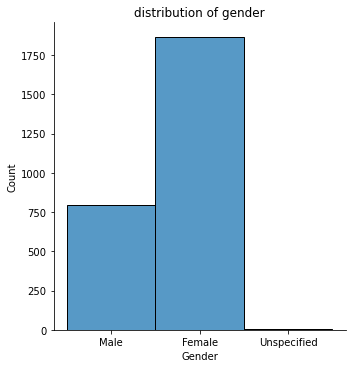

In [31]:
# plot distribution of gender
sns.displot(Userdf['Gender']).set(title = 'distribution of gender')
plt.show()

**conclusion:**  Female users is more than twice as many as male users. **The gender distribution of the sample is uneven as more than 2/3 are females.** I should take care of this in later exploration. It would be not fair to simply compare activities visiting times based on gender, because generally females more than males, which can not lead to conclusion that female users are more likely to use specific modules that males. 

## Plot 2 : What health issues do most of users suffering from?

In [32]:
# plot distribution of health condition 
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y='CareSysCondition', data = Userdf, color='c').set(title = 'Users health condition')
plt.show()

**conclusion:** Users who use the Clevercogs are in varies health condion. Majority are elderly peole who are suffering from aging problem. Besides, there are a considerable number of users who are suffering dementia (rank second) or mental health issues (rank third). 

## Plot 3 : Are there any difference of health conditions for users who are less than 60 years old and larger than 60 years old? 

In this part, I will look into distribution of health condition for (10-60 years old) group and (60+ years old) group. The exploration will go in this way:
1. Calculate new column of 'age' based on field 'Birth date' and append it to the 'Userdf'
2. Considering the context of targeting users of Clevercogs, after discussion with data holder and tutor, user who is under 10 and above 120 are considered as outliers. Drop the outliers.
3. Group age into two intervals: (10-60 years old) and (60+ years old) groups.
4. Plot the pair graph for health distribution in (10-60 years old) and (60+ years old) groups to find if there is any difference for younger group and elderly group.

In [33]:
# define a function called age that convert birth date to age
def age(birthdate):
    if pd.isna(birthdate):
        return np.nan
    else:
        today = date.today()
        return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))

In [34]:
# convert birth date to age by calling the function age
Userdf['Age'] = Userdf['Birth date'].apply(age)
Userdf

User ID                             VisitorID ExternalID Birth date  \
0         370  E71C1EB8-6E61-4DB5-BE19-8E3AB8FBE95C      999.0        NaT   
1         513  AECC9A91-F1C8-48AE-905A-F7B154F3856F      998.0        NaT   
2         523  0FBAE268-6A07-4E4B-BCD2-A0DADAAD702D     5089.0 1980-01-05   
3         527  B2F7DAC6-4A8F-4D83-8684-0A5CCAACA9B8     5643.0 1980-04-04   
4         532  42903CBD-8A6B-43C7-98D0-37962BCF3B33     5245.0        NaT   
...       ...                                   ...        ...        ...   
2659     5669  AA7D0684-B18F-4F3B-8550-B6D31C6860F7     9599.0        NaT   
2660     5670  6DC0A37F-1138-4870-99CA-264F28AA2F66     9600.0 1952-11-02   
2661     5671  5CEA1684-0922-49E7-859D-40A8DF20B4B6     9601.0 2002-09-24   
2662     5674  F60407F3-CEE0-485C-AECB-B0CFE4ECBCC8     9602.0 2001-12-22   
2663     5676  BE652161-DEAF-4A3F-9A76-F8D1E4E99B49     9603.0        NaT   

      Gender                                           Location  \
0       Male                                   Aberdeen Council   
1       Male                                           National   
2       Male  Test Machines Live/Test Region/Test Area/Test ...   
3     Female                                           National   
4     Female    National/North/Stirling Council/Broom Care Home   
...      ...                                                ...   
2659    Male  National/EAST /Edinburgh City Council/Edinburg...   
2660    Male  National/EAST /Edinburgh City Council/Edinburg...   
2661  Female   National/North/Stirling Council/Forth Valley C@H   
2662  Female  National/EAST /Edinburgh City Council/Edinburg...   
2663    Male  National/North/Dundee City Council/Menzieshill...   

     CareSysCondition   Age  
0                 NaN   NaN  
1                 NaN   NaN  
2                 NaN  41.0  
3                 NaN  41.0  
4                 NaN   NaN  
...               ...   ...  
2659              NaN   NaN  
2660              NaN  69.0  
2661              NaN  19.0  
2662              NaN  19.0  
2663              NaN   NaN  

[2664 rows x 8 columns]

In [35]:
# check the maximum and minimum value in 'age'
Userdf['Age'].max(), Userdf['Age'].min()

(121.0, 0.0)

In [52]:
# drop the age that less than 18
Userdf.drop(Userdf[Userdf.Age <= 18].index, inplace=True)

In [53]:
# check the maximum and minimum value in 'age'
Userdf['Age'].max(), Userdf['Age'].min()

(120.0, 19.0)

In [54]:
# replace the outliers in 'Age' column with NaN
Userdf.loc[Userdf.Age > 120,'Age']= np.nan
Userdf['Age'].max(), Userdf['Age'].min()

(120.0, 19.0)

In [37]:
# Group age into two intervals: (10-60 years old) and (60+ years old) and assign it to 'AgeGroup' column
bins= [Userdf['Age'].min(),60,Userdf['Age'].max()]
labels = ['10-60 years old','60+ years old']
Userdf['AgeGroup'] = pd.cut(Userdf['Age'], bins=bins, labels=labels, right=False)
Userdf

User ID                             VisitorID ExternalID Birth date  \
0         370  E71C1EB8-6E61-4DB5-BE19-8E3AB8FBE95C      999.0        NaT   
1         513  AECC9A91-F1C8-48AE-905A-F7B154F3856F      998.0        NaT   
2         523  0FBAE268-6A07-4E4B-BCD2-A0DADAAD702D     5089.0 1980-01-05   
3         527  B2F7DAC6-4A8F-4D83-8684-0A5CCAACA9B8     5643.0 1980-04-04   
4         532  42903CBD-8A6B-43C7-98D0-37962BCF3B33     5245.0        NaT   
...       ...                                   ...        ...        ...   
2659     5669  AA7D0684-B18F-4F3B-8550-B6D31C6860F7     9599.0        NaT   
2660     5670  6DC0A37F-1138-4870-99CA-264F28AA2F66     9600.0 1952-11-02   
2661     5671  5CEA1684-0922-49E7-859D-40A8DF20B4B6     9601.0 2002-09-24   
2662     5674  F60407F3-CEE0-485C-AECB-B0CFE4ECBCC8     9602.0 2001-12-22   
2663     5676  BE652161-DEAF-4A3F-9A76-F8D1E4E99B49     9603.0        NaT   

      Gender                                           Location  \
0       Male                                   Aberdeen Council   
1       Male                                           National   
2       Male  Test Machines Live/Test Region/Test Area/Test ...   
3     Female                                           National   
4     Female    National/North/Stirling Council/Broom Care Home   
...      ...                                                ...   
2659    Male  National/EAST /Edinburgh City Council/Edinburg...   
2660    Male  National/EAST /Edinburgh City Council/Edinburg...   
2661  Female   National/North/Stirling Council/Forth Valley C@H   
2662  Female  National/EAST /Edinburgh City Council/Edinburg...   
2663    Male  National/North/Dundee City Council/Menzieshill...   

     CareSysCondition   Age         AgeGroup  
0                 NaN   NaN              NaN  
1                 NaN   NaN              NaN  
2                 NaN  41.0  10-60 years old  
3                 NaN  41.0  10-60 years old  
4                 NaN   NaN              NaN  
...               ...   ...              ...  
2659              NaN   NaN              NaN  
2660              NaN  69.0    60+ years old  
2661              NaN  19.0  10-60 years old  
2662              NaN  19.0  10-60 years old  
2663              NaN   NaN              NaN  

[2664 rows x 9 columns]

In [38]:
# plot the health condition distribution of younger group (10-60 years old) and elderly group (60+ years old)
sns.set(font_scale = 2)
sns.catplot( y='CareSysCondition',col='AgeGroup', kind='count', data=Userdf, height=12, aspect=1.5)

In [55]:
Userdf.to_csv ('user_data_2021.csv', index = False, header=True)